<a href="https://colab.research.google.com/github/NariMo91/GANs-generative-art/blob/main/malli_stylegan_ada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# malliGAN
model: StyleGAN2-ADA

## GPU Type

In [ ]:
!nvidia-smi

Sun Oct 10 02:28:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Environment Set-up

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Downgrade to previous Pytorch version

In [ ]:
!pip uninstall torch

Found existing installation: torch 1.9.0+cu102
Uninstalling torch-1.9.0+cu102:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/lib/python3.7/dist-packages/caffe2/*
    /usr/local/lib/python3.7/dist-packages/torch-1.9.0+cu102.dist-info/*
    /usr/local/lib/python3.7/dist-packages/torch/*
Proceed (y/n)? y
y
y
  Successfully uninstalled torch-1.9.0+cu102


In [ ]:
!pip install torch==1.8.1 torchvision==0.9.1

     |████████████████████████████████| 804.1 MB 2.6 kB/s 
     |████████████████████████████████| 17.4 MB 200 kB/s 
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.8.1 which is incompatible.


Install additional dependencies

In [ ]:
!pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

     |████████████████████████████████| 195 kB 6.7 MB/s 
     |████████████████████████████████| 108 kB 52.8 MB/s 
     |████████████████████████████████| 26.9 MB 1.2 MB/s 


#### Install NVIDIA StyleGAN2 ADA Pytorch

In [ ]:
!git clone https://github.com/NariMo91/stylegan2-ada-pytorch

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 125, done.
remote: Total 125 (delta 0), reused 0 (delta 0), pack-reused 125
Receiving objects: 100% (125/125), 1.12 MiB | 3.07 MiB/s, done.
Resolving deltas: 100% (55/55), done.


## Convert images

In [ ]:
!python /content/stylegan2-ada-pytorch/dataset_tool.py --source /content/drive/MyDrive/malliGAN/images/food-eheitner1024 --dest /content/drive/MyDrive/malliGAN/datasets/food-eheitner1024

100% 392/392 [02:21<00:00,  2.77it/s]


In [ ]:
# If things go wrong
# !rm -R /content/drive/MyDrive/malliGAN/datasets/food-eheitner1024/*

## Initial training

In [ ]:
import os

# Modify these to suit your needs
RESULTS = "/content/drive/MyDrive/malliGAN/results"
DATA = "/content/drive/MyDrive/malliGAN/datasets/food-eheitner1024"
SNAP = 4
MIRRORED = True
AUG = "ada"
AUGPIPE = "bgcfnc"
TARGET = 0.7

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --outdir {RESULTS} --data {DATA} --mirror {MIRRORED} --aug {AUG} --augpipe {AUGPIPE} --target {TARGET}"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 4,
  "network_snapshot_ticks": 4,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/malliGAN/datasets/food-eheitner1024",
    "use_labels": false,
    "max_size": 392,
    "xflip": true,
    "resolution": 1024
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base

## Resume training

In [1]:
import os

# Modify these to suit your needs
RESULTS = "/content/drive/MyDrive/malliGAN/results"
RESUME = "/content/drive/MyDrive/malliGAN/results/00000-food-eheitner1024-mirror-auto1-ada-target0.7-bgcfnc/network-snapshot-000048.pkl"
DATA = "/content/drive/MyDrive/malliGAN/datasets/food-eheitner1024"
SNAP = 4
MIRRORED = True
AUG = "ada"
AUGPIPE = "bgcfnc"
TARGET = 0.7

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {RESULTS} --data {DATA} --mirror {MIRRORED} --aug {AUG} --augpipe {AUGPIPE} --target {TARGET}"
!{cmd}

/usr/bin/python3: can't open file '/content/stylegan2-ada-pytorch/train.py': [Errno 2] No such file or directory


In [2]:
import os

# Modify these to suit your needs
RESULTS = "/content/drive/MyDrive/malliGAN/results"
RESUME = "/content/drive/MyDrive/malliGAN/results/00001-food-eheitner1024-mirror-auto1-ada-target0.7-bgcfnc-resumecustom/network-snapshot-000096.pkl"
DATA = "/content/drive/MyDrive/malliGAN/datasets/food-eheitner1024"
SNAP = 4
MIRRORED = True
AUG = "ada"
AUGPIPE = "bgcfnc"
TARGET = 0.7

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {RESULTS} --data {DATA} --mirror {MIRRORED} --aug {AUG} --augpipe {AUGPIPE} --target {TARGET}"
!{cmd}

/usr/bin/python3: can't open file '/content/stylegan2-ada-pytorch/train.py': [Errno 2] No such file or directory


In [3]:
import os

# Modify these to suit your needs
RESULTS = "/content/drive/MyDrive/malliGAN/results"
RESUME = "/content/drive/MyDrive/malliGAN/results/00002-food-eheitner1024-mirror-auto1-ada-target0.7-bgcfnc-resumecustom/network-snapshot-000096.pkl"
DATA = "/content/drive/MyDrive/malliGAN/datasets/food-eheitner1024"
SNAP = 4
MIRRORED = True
AUG = "ada"
AUGPIPE = "bgcfnc"
TARGET = 0.7

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {RESULTS} --data {DATA} --mirror {MIRRORED} --aug {AUG} --augpipe {AUGPIPE} --target {TARGET}"
!{cmd}

/usr/bin/python3: can't open file '/content/stylegan2-ada-pytorch/train.py': [Errno 2] No such file or directory


In [4]:
import os

# Modify these to suit your needs
RESULTS = "/content/drive/MyDrive/malliGAN/results"
RESUME = "/content/drive/MyDrive/malliGAN/results/00003-food-eheitner1024-mirror-auto1-ada-target0.7-bgcfnc-resumecustom/network-snapshot-000112.pkl"
DATA = "/content/drive/MyDrive/malliGAN/datasets/food-eheitner1024"
SNAP = 4
MIRRORED = True
AUG = "ada"
AUGPIPE = "bgc"
TARGET = 0.7

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {RESULTS} --data {DATA} --mirror {MIRRORED} --aug {AUG} --augpipe {AUGPIPE} --target {TARGET}"
!{cmd}

/usr/bin/python3: can't open file '/content/stylegan2-ada-pytorch/train.py': [Errno 2] No such file or directory


In [5]:
import os

# Modify these to suit your needs
RESULTS = "/content/drive/MyDrive/malliGAN/results"
RESUME = "/content/drive/MyDrive/malliGAN/results/00004-food-eheitner1024-mirror-auto1-ada-target0.7-bgc-resumecustom/network-snapshot-000112.pkl"
DATA = "/content/drive/MyDrive/malliGAN/datasets/food-eheitner1024"
SNAP = 4
MIRRORED = True
AUG = "ada"
AUGPIPE = "bgc"
TARGET = 0.7

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {RESULTS} --data {DATA} --mirror {MIRRORED} --aug {AUG} --augpipe {AUGPIPE} --target {TARGET}"
!{cmd}

/usr/bin/python3: can't open file '/content/stylegan2-ada-pytorch/train.py': [Errno 2] No such file or directory


In [6]:
import os

# Modify these to suit your needs
RESULTS = "/content/drive/MyDrive/malliGAN/results"
RESUME = "/content/drive/MyDrive/malliGAN/results/00005-food-eheitner1024-mirror-auto1-ada-target0.7-bgc-resumecustom/network-snapshot-000112.pkl"
DATA = "/content/drive/MyDrive/malliGAN/datasets/food-eheitner1024"
SNAP = 4
MIRRORED = True
AUG = "ada"
AUGPIPE = "bgc"
TARGET = 0.7

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {RESULTS} --data {DATA} --mirror {MIRRORED} --aug {AUG} --augpipe {AUGPIPE} --target {TARGET}"
!{cmd}

/usr/bin/python3: can't open file '/content/stylegan2-ada-pytorch/train.py': [Errno 2] No such file or directory


## Plot Metrics

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Extract FID from the multiple training runs

In [ ]:
with open("/content/drive/MyDrive/malliGAN/results/00000-food-eheitner1024-mirror-auto1-ada-target0.7-bgcfnc/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
json_list

['{"results": {"fid50k_full": 362.0709050767614}, "metric": "fid50k_full", "total_time": 2313.912511587143, "total_time_str": "38m 34s", "num_gpus": 1, "snapshot_pkl": "network-snapshot-000000.pkl", "timestamp": 1631588116.2966187}\n',
 '{"results": {"fid50k_full": 369.2238479424669}, "metric": "fid50k_full", "total_time": 2301.6874616146088, "total_time_str": "38m 22s", "num_gpus": 1, "snapshot_pkl": "network-snapshot-000016.pkl", "timestamp": 1631597871.0039513}\n',
 '{"results": {"fid50k_full": 299.9726982568777}, "metric": "fid50k_full", "total_time": 2301.8887615203857, "total_time_str": "38m 22s", "num_gpus": 1, "snapshot_pkl": "network-snapshot-000032.pkl", "timestamp": 1631607624.9745834}\n']

In [ ]:
data = [json.loads(line) for line in json_list]

In [ ]:
data

[{'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'fid50k_full': 362.0709050767614},
  'snapshot_pkl': 'network-snapshot-000000.pkl',
  'timestamp': 1631588116.2966187,
  'total_time': 2313.912511587143,
  'total_time_str': '38m 34s'},
 {'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'fid50k_full': 369.2238479424669},
  'snapshot_pkl': 'network-snapshot-000016.pkl',
  'timestamp': 1631597871.0039513,
  'total_time': 2301.6874616146088,
  'total_time_str': '38m 22s'},
 {'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'fid50k_full': 299.9726982568777},
  'snapshot_pkl': 'network-snapshot-000032.pkl',
  'timestamp': 1631607624.9745834,
  'total_time': 2301.8887615203857,
  'total_time_str': '38m 22s'}]

In [ ]:
for i, _ in enumerate(data):
  data[i]['fid50k_full'] = data[i]['results']['fid50k_full']
  data[i]['kimg'] = i * 4 * 4

In [ ]:
data

[{'fid50k_full': 362.0709050767614,
  'kimg': 0,
  'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'fid50k_full': 362.0709050767614},
  'snapshot_pkl': 'network-snapshot-000000.pkl',
  'timestamp': 1631588116.2966187,
  'total_time': 2313.912511587143,
  'total_time_str': '38m 34s'},
 {'fid50k_full': 369.2238479424669,
  'kimg': 16,
  'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'fid50k_full': 369.2238479424669},
  'snapshot_pkl': 'network-snapshot-000016.pkl',
  'timestamp': 1631597871.0039513,
  'total_time': 2301.6874616146088,
  'total_time_str': '38m 22s'},
 {'fid50k_full': 299.9726982568777,
  'kimg': 32,
  'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'fid50k_full': 299.9726982568777},
  'snapshot_pkl': 'network-snapshot-000032.pkl',
  'timestamp': 1631607624.9745834,
  'total_time': 2301.8887615203857,
  'total_time_str': '38m 22s'}]

In [ ]:
with open("/content/drive/MyDrive/malliGAN/results/00001-food-eheitner1024-mirror-auto1-ada-target0.7-bgcfnc-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
data2 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data2):
  data2[i]['fid50k_full'] = data2[i]['results']['fid50k_full']
  data2[i]['kimg'] = (i * 4 * 4) + 48 #add kimg from previous run

In [ ]:
data2

[{'fid50k_full': 231.93313160636123,
  'kimg': 48,
  'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'fid50k_full': 231.93313160636123},
  'snapshot_pkl': 'network-snapshot-000000.pkl',
  'timestamp': 1631649920.2616522,
  'total_time': 2546.3751966953278,
  'total_time_str': '42m 26s'},
 {'fid50k_full': 187.61681349739325,
  'kimg': 64,
  'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'fid50k_full': 187.61681349739325},
  'snapshot_pkl': 'network-snapshot-000016.pkl',
  'timestamp': 1631660968.3264294,
  'total_time': 2390.8223462104797,
  'total_time_str': '39m 51s'},
 {'fid50k_full': 207.2614859233689,
  'kimg': 80,
  'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'fid50k_full': 207.2614859233689},
  'snapshot_pkl': 'network-snapshot-000032.pkl',
  'timestamp': 1631672026.3032165,
  'total_time': 2381.9961335659027,
  'total_time_str': '39m 42s'},
 {'fid50k_full': 161.12890958917302,
  'kimg': 96,
  'metric': 'fid50k_full',
  'num_gpus': 1,
  'results': {'f

In [ ]:
with open("/content/drive/MyDrive/malliGAN/results/00002-food-eheitner1024-mirror-auto1-ada-target0.7-bgcfnc-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
data3 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data3):
  data3[i]['fid50k_full'] = data3[i]['results']['fid50k_full']
  data3[i]['kimg'] = (i * 4 * 4) + 144 #add kimg from previous run

In [ ]:
data3[-1]['kimg']

240

In [ ]:
with open("/content/drive/MyDrive/malliGAN/results/00003-food-eheitner1024-mirror-auto1-ada-target0.7-bgcfnc-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
data4 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data4):
  data4[i]['fid50k_full'] = data4[i]['results']['fid50k_full']
  data4[i]['kimg'] = (i * 4 * 4) + data3[-1]['kimg'] #add kimg from previous run

In [ ]:
with open("/content/drive/MyDrive/malliGAN/results/00004-food-eheitner1024-mirror-auto1-ada-target0.7-bgc-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
data5 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data5):
  data5[i]['fid50k_full'] = data5[i]['results']['fid50k_full']
  data5[i]['kimg'] = (i * 4 * 4) + data4[-1]['kimg'] #add kimg from previous run

In [ ]:
with open("/content/drive/MyDrive/malliGAN/results/00005-food-eheitner1024-mirror-auto1-ada-target0.7-bgc-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
data6 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data6):
  data6[i]['fid50k_full'] = data6[i]['results']['fid50k_full']
  data6[i]['kimg'] = (i * 4 * 4) + data5[-1]['kimg'] #add kimg from previous run

In [ ]:
with open("/content/drive/MyDrive/malliGAN/results/00006-food-eheitner1024-mirror-auto1-ada-target0.7-bgc-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
data7 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data7):
  data7[i]['fid50k_full'] = data7[i]['results']['fid50k_full']
  data7[i]['kimg'] = (i * 4 * 4) + data6[-1]['kimg'] #add kimg from previous run

In [ ]:
with open("/content/drive/MyDrive/malliGAN/results/00007-food-eheitner1024-mirror-auto1-ada-target0.7-bgc-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
data8 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data8):
  data8[i]['fid50k_full'] = data8[i]['results']['fid50k_full']
  data8[i]['kimg'] = (i * 4 * 4) + data7[-1]['kimg'] #add kimg from previous run

In [ ]:
with open("/content/drive/MyDrive/malliGAN/results/00008-food-eheitner1024-mirror-auto1-ada-target0.7-bgc-resumecustom/metric-fid50k_full.jsonl", 'r') as f:
  json_list = list(f)

In [ ]:
data9 = [json.loads(line) for line in json_list]
for i, _ in enumerate(data9):
  data9[i]['fid50k_full'] = data9[i]['results']['fid50k_full']
  data9[i]['kimg'] = (i * 4 * 4) + data8[-1]['kimg'] #add kimg from previous run

In [ ]:
fid_all = data + data2 + data3 + data4 + data5 + data6 + data7 + data8 + data9

In [ ]:
df = pd.DataFrame(fid_all)
df[df.duplicated(subset='kimg', keep=False)]

,results,metric,total_time,total_time_str,num_gpus,snapshot_pkl,timestamp,fid50k_full,kimg
9,{'fid50k_full': 135.95974347368414},fid50k_full,2389.670976,39m 50s,1,network-snapshot-000096.pkl,1.631716e+09,135.959743,144
10,{'fid50k_full': 136.039789658117},fid50k_full,2558.623752,42m 39s,1,network-snapshot-000000.pkl,1.631744e+09,136.039790,144
16,{'fid50k_full': 90.6646674088789},fid50k_full,2443.376663,40m 43s,1,network-snapshot-000096.pkl,1.631812e+09,90.664667,240
17,{'fid50k_full': 90.77434383701686},fid50k_full,2440.454109,40m 40s,1,network-snapshot-000000.pkl,1.631818e+09,90.774344,240
24,{'fid50k_full': 85.5219995854263},fid50k_full,2297.698040,38m 18s,1,network-snapshot-000112.pkl,1.631887e+09,85.522000,352
25,{'fid50k_full': 85.6499673783444},fid50k_full,2378.774137,39m 39s,1,network-snapshot-000000.pkl,1.632022e+09,85.649967,352
32,{'fid50k_full': 78.62854357308844},fid50k_full,2303.013170,38m 23s,1,network-snapshot-000112.pkl,1.632089e+09,78.628544,464
33,{'fid50k_full': 78.31712146700978},fid50k_full,2370.420745,39m 30s,1,network-snapshot-000000.pkl,1.632126e+09,78.317121,464
40,{'fid50k_full': 73.77386964112637},fid50k_full,2292.819276,38m 13s,1,network-snapshot-000112.pkl,1.632193e+09,73.773870,576
41,{'fid50k_full': 73.60023435943094},fid50k_full,2521.918525,42m 02s,1,network-snapshot-000000.pkl,1.632217e+09,73.600234,576


In [ ]:
df = df.drop_duplicates(subset='kimg', keep='last')
df

,results,metric,total_time,total_time_str,num_gpus,snapshot_pkl,timestamp,fid50k_full,kimg
0,{'fid50k_full': 362.0709050767614},fid50k_full,2313.912512,38m 34s,1,network-snapshot-000000.pkl,1.631588e+09,362.070905,0
1,{'fid50k_full': 369.2238479424669},fid50k_full,2301.687462,38m 22s,1,network-snapshot-000016.pkl,1.631598e+09,369.223848,16
2,{'fid50k_full': 299.9726982568777},fid50k_full,2301.888762,38m 22s,1,network-snapshot-000032.pkl,1.631608e+09,299.972698,32
3,{'fid50k_full': 231.93313160636123},fid50k_full,2546.375197,42m 26s,1,network-snapshot-000000.pkl,1.631650e+09,231.933132,48
4,{'fid50k_full': 187.61681349739325},fid50k_full,2390.822346,39m 51s,1,network-snapshot-000016.pkl,1.631661e+09,187.616813,64
5,{'fid50k_full': 207.2614859233689},fid50k_full,2381.996134,39m 42s,1,network-snapshot-000032.pkl,1.631672e+09,207.261486,80
6,{'fid50k_full': 161.12890958917302},fid50k_full,2384.799634,39m 45s,1,network-snapshot-000048.pkl,1.631683e+09,161.128910,96
7,{'fid50k_full': 151.32710140951588},fid50k_full,2387.465434,39m 47s,1,network-snapshot-000064.pkl,1.631694e+09,151.327101,112
8,{'fid50k_full': 137.319075007602},fid50k_full,2373.956124,39m 34s,1,network-snapshot-000080.pkl,1.631705e+09,137.319075,128
10,{'fid50k_full': 136.039789658117},fid50k_full,2558.623752,42m 39s,1,network-snapshot-000000.pkl,1.631744e+09,136.039790,144


In [ ]:
# lowest FID achieved during training
round(df['fid50k_full'].min(), 2)

67.56

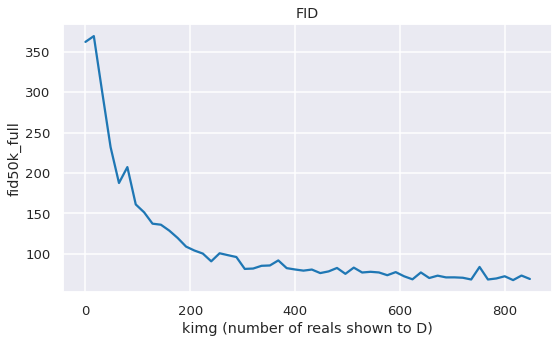

In [ ]:
sns.set_context('talk', font_scale=0.8)
sns.set_style('darkgrid')

plt.figure(figsize=(8,5))
sns.lineplot(x='kimg', y='fid50k_full', data=df)
plt.title('FID')
plt.tight_layout()
plt.xlabel('kimg (number of reals shown to D)')
plt.savefig('/content/drive/MyDrive/malliGAN/malliFID.png');